# Python's Counter: O jeito pythônico de contar objetos

Um problema muito comum, na programação, é contar elementos repetidos. Python oferece um monte de ferramentas e técnicas que você pode usar para resolver esse problema. No entanto, a classe `Counter`, do módulo `collections`, tem uma solução limpa, eficiente e pythônica.

Esta subclasse de `dict` vem uma funcionalidade de contagem eficiente por padrão. Entender como `Counter` funciona e como usá-lo eficientemente é uma habilidade conveniente para um desenvolvedor de Python.

Neste tutorial, você aprenderá a:

- Contar vários objetos repetidos de uma só vez:
- Criar contadores com o a classe `Counter`
- Recuperar os objetos mais comuns em um contador
- Atualizar contagens de objetos
- Use o contador para facilitar cálculos

Você também aprenderá sobre o básico de usar o contador como um multiconjunto(multisset), que é um recurso adicional dessa classe.

## Contando objetos em Python

Às vezes, você precisa contar os objetos em uma determinada fonte de dados, para saber quantas vezes eles ocorrem. Em outras palavras, você precisa determinar sua frequência. Por exemplo, você pode querer saber quantas vezes um item específico aparece em uma lista ou sequência de valores.

Quando sua lista é curta, contar os itens pode ser algo direto e rápido. No entanto, quando você tem uma lista longa, contar os items pode ser mais desafiador.

Para contar objetos, você normalmente usa um contador, que é uma variável inteira com um valor inicial de zero. Em seguida, você incremente o contador para refletir o número de vezes que um determinado objeto aparece na fonte de dados de entrada.

Quando você está contando as ocorrências de um único objeto, você pode usar um único contador. No entanto, quando você precisa contar vários objetos diferentes, você precisa criar um contador pra cada categoria de objeto.

Para contar vários objetos diferentes de uma só vez, você pode usar um dicionário Python. As chaves do dicionário armazenarão os objetos que você deseja contar. Os valores do dicionário manterão o número de repetições de um determinado objeto ou a contagem do objeto.

Por exemplo, para contar os objetos em uma sequência usando um dicionário, você pode iterar sobre a sequência, verificar se o objeto atual não está no dicionário para inicializar o contador (par de chave de valor) e, em seguida, incrementar sua contagem de acordo.

Aqui está um exemplo que conta as letras na palavra "Mississippi":

In [1]:
word = "mississippi"
counter = {}

for letter in word:
    if letter not in counter:
        counter[letter] = 0
    counter[letter] += 1

counter


{'m': 1, 'i': 4, 's': 4, 'p': 2}

O loop `for` itera sobre as letras da palavra. Em cada iteração, a condicional verifica se a letra atual não é uma chave no dicionário que você está usando como contador. Em caso afirmativo (ou seja, o dicionário não contém um item com a letra atual como chave), cria uma nova chave com a letra e inicializa sua contagem para zero. O passo final é incrementar o valor do item por um. Quando você acessa o contador, você vê que as letras funcionam como chaves e os valores como contagens.

> Nota: Quando você está contando vários objetos repetidos com dicionários,
> tenha em mente que eles devem ser *hashable*, uma vez que eles devem funcionar
> como chaves de dicionário. Ser *hashable* significa que seus objetos devem ter
> um valor de hash que nunca muda durante a sua vida. Em Python, objetos
> imutáveis também são *hashable*.

Outro jeito de contar objetos com um dicionário é usar o `dict.get()` com `0` como um valor padrão:

In [2]:
word = "mississippi"
counter = {}

for letter in word:
    counter[letter] = counter.get(letter, 0) + 1

counter

{'m': 1, 'i': 4, 's': 4, 'p': 2}

Quando você chamou o método `.get()` desse jeito, passando o `0` como valor padrão, você obtém a contagem atual de uma determinada letra ou 0 (o padrão),caso a letra estiver não seja encontrada no dicionário. Então, você incremente a contagem por 1 e armazena o valor sob a letra correspondente, no dicionário.

Você também pode usar o `defaultdict`, do módulo `collections`, para contar objetos dentro de um loop:

In [3]:
from collections import defaultdict  # noqa E402

word = "mississippi"
counter = defaultdict(int)

for letter in word:
    counter[letter] += 1

counter

defaultdict(int, {'m': 1, 'i': 4, 's': 4, 'p': 2})

Esta solução é mais concisa e legível. Primeiro, você inicializa o contador usando um `defaultdict` com `int()` como uma função fábrica padrão. Dessa forma, quando você acessa uma chave que não existe no `defaultdict`, o dicionário cria automaticamente a chave e inicializa-o com o valor que a função de fábrica retorna.

Neste exemplo, como você está usando `int()` como uma função fábrica, o valor inicial é `0`, que é o resultado de chamar `int()` sem argumentos.

Como com muitas outras tarefas frequentes na programação, Python tem um jeito melhor de abordar o problema da contagem. O módulo `collections` tem uma classe especialmente projetada para contar vários objetos diferentes de uma só vez.Esta classe é, convenientemente, chamada de `Counter`.

## Conhecendo o Counter

`Counter` é uma subclasse de `dict` especialmente projetada para contar objetos *hashable*. É um dicionário que armazena objetos como chaves e a contagem como valores. Para contar com `Counter`, você fornece uma seqüência, ou iterável, de objetos hashable como um argumento para o construtor da classe.

`Counter` itera através da sequência fornecida como entrada, conta o número de vezes que um determinado objeto ocorre e armazena objetos como chaves e as contagens como valores. Na próxima seção, você aprenderá sobre diferentes maneiras de construir contadores.

### Construindo Counters

Existem várias maneiras de criar instâncias de `Counter`. No entanto, se o seu objetivo é contar vários objetos de uma só vez, você precisará usar uma sequência ou iterável para inicializar o contador. Por exemplo, aqui está como você pode reescrever o exemplo do Mississippi usando o Counter:

In [4]:
from collections import Counter  # noqa E402

# Use a string as an argument
counter_from_string = Counter("mississippi")
print(counter_from_string)


# Use a list as an argument
counter_from_list = Counter(list("mississippi"))
print(counter_from_list)

Counter({'i': 4, 's': 4, 'p': 2, 'm': 1})
Counter({'i': 4, 's': 4, 'p': 2, 'm': 1})


`Counter` itera sobre "mississippi" e produz um dicionário com as letras como chaves e sua frequência como valores. No primeiro exemplo, você usa uma string como um argumento para `Counter`. Você também pode usar listas, tuplas ou quaisquer iteráveis com objetos repetidos, como você vê no segundo exemplo.

> Nota: Na classe Counter, uma função C altamente otimizada implementa a
> funcionalidade de contagem. Se esta função não estiver disponível por algum
> motivo, a classe usa uma função de python equivalente, mas menos eficiente.

Existem outras maneiras de criar instâncias de `Counter`. No entanto, eles não implicam estritamente a contagem. Por exemplo, você pode usar um dicionário, contendo chaves e contagens, como esta:

In [5]:
from collections import Counter  # noqa E402

Counter({"i": 4, "s": 4, "p": 2, "m": 1})


Counter({'i': 4, 's': 4, 'p': 2, 'm': 1})

O contador agora tem um grupo inicial de pares de chaves e contagens. Essa maneira de criar uma instância de contagem é útil quando você precisar fornecer as contagens iniciais de um grupo existente de objetos.

Você também pode produzir resultados semelhantes usando argumentos de palavras-chave, quando você chama o construtor da classe:

In [6]:
from collections import Counter  # noqa E402

Counter(i=4, s=4, p=2, m=1)

Counter({'i': 4, 's': 4, 'p': 2, 'm': 1})

Mais uma vez, você pode usar essa abordagem para criar um objeto `Counter` com um estado inicial específico para seus pares chave-valor.

Na prática, se você estiver usando `Counter` para contar as coisas do zero, você não precisará inicializar as contagens, pois eles têm um valor zero por padrão. Outra possibilidade pode ser inicializar as contagens para 1. Nesse caso, você pode fazer algo assim:

In [7]:
from collections import Counter  # noqa E402


Counter(set("mississippi"))

Counter({'p': 1, 'i': 1, 'm': 1, 's': 1})

Em Python, os `sets` armazenam objetos únicos, portanto, a chamada para `set()`, neste exemplo, elimina as letras repetidas. Depois disso, você acaba com uma instância de cada letra iterável original.

Counter herda a interface de dicionários regulares. No entanto, não fornece uma implementação de `.fromkeys()`, para evitar ambiguidades, como `Counter.fromkeys("mississippi", 2)`. Neste exemplo específico, cada letra teria uma contagem padrão de 2, apesar de seu número atual de ocorrências no iterável de entrada.

Não há restrições sobre os objetos que você pode armazenar nas chaves e valores de um contador. As chaves podem armazenar objetos *hashable*, enquanto os valores podem armazenar objetos. No entanto, para trabalhar como contadores, os valores devem ser números inteiros representando contagens.

Aqui está um exemplo de uma instância de contagem que mantém contagens negativas e zero:

In [8]:
from collections import Counter  # noqa E402

inventory = Counter(
    apple=10,
    orange=15,
    banana=0,
    tomato=-15
)

inventory

Counter({'apple': 10, 'orange': 15, 'banana': 0, 'tomato': -15})

Neste exemplo, você pode perguntar: "Por que eu tenho -15 tomates?". Bem, essa poderia ser uma convenção interna para sinalizar que você tem ordem de um cliente para 15 tomates, e você não tem nenhum inventário atual. Quem sabe? O contador permite que você faça isso, e você provavelmente pode encontrar alguns casos de uso para o recurso.

### Atualizando contagens de objetos

Uma vez que você tenha uma instância de `Counter`, você pode usar método `.update()` para atualizá-lo com novos objetos e contagens. Em vez de substituir valores como sua contraparte de `dict`, a implementação do método `.update()`, fornecida por `Counter`, adiciona as contagens existentes ao conjunto ou cria novos pares de chave-contagem, quando necessário.

Você pode usar, como argumentos do `.update()`, tanto com iteráveis quanto com mapeamentos de contagens. Se você usar um iterável, o método conta seus itens e atualiza o contador de acordo.

In [9]:
from collections import Counter  # noqa E402

letters = Counter({"i": 4, "s": 4, "p": 2, "m": 1})

letters.update("missouri")
letters

Counter({'i': 6, 's': 6, 'p': 2, 'm': 2, 'o': 1, 'u': 1, 'r': 1})

Agora você tem 6 instâncias de 'i', 6 instâncias de 's', e assim por diante.Você também tem alguns novos pares de contagem de chaves, como 'o': 1, 'u': 1, e 'r': 1. Note que o iterável precisa ser uma seqüência de itens em vez de uma sequência de pares chave-contagem.

> Nota: Como você já sabe, não há restrições sobre os valores (contagens) que
> você pode armazenar em um contador.
>
> Todavia, usar objetos que não são números inteiros como valores pode quebrar
> recursos comuns do Counter:

In [10]:
import traceback  # noqa E402
from collections import Counter  # noqa E402


letters = Counter({"i": "4", "s": "4", "p": "2", "m": "1"})
try:
    letters.update("missouri")
except Exception:
    traceback.print_exc()

Traceback (most recent call last):
  File "C:\Users\josen\AppData\Local\Temp/ipykernel_24336/1521167072.py", line 7, in <module>
    letters.update("missouri")
  File "E:\repositorios\alura\.venv\lib\collections\__init__.py", line 679, in update
    _count_elements(self, iterable)
TypeError: can only concatenate str (not "int") to str


> Neste exemplo, as contagens das letras são strings, em vez de valores
> inteiros.Isso quebra `.update()`, fazendo com que um `TypeError` seja lançado.

A segunda maneira de usar `.update()` é fornecer outro contador ou um mapeamento de contagens como argumento. Nesse caso, você pode fazer algo assim:

In [11]:
from collections import Counter  # noqa E402


sales = Counter(apple=25, orange=15, banana=12)

# Usando outro Counter
monday_sales = Counter(apple=10, orange=8, banana=3)
sales.update(monday_sales)
sales

Counter({'apple': 35, 'orange': 23, 'banana': 15})

In [12]:
# Usando um dicionário de contagens
tuesday_sales = {"apple": 4, "orange": 7, "tomato": 4}
sales.update(tuesday_sales)
sales


Counter({'apple': 39, 'orange': 30, 'banana': 15, 'tomato': 4})

No primeiro exemplo, você atualiza um contador existente, `sales`, usando outro contador, `monday_sales`. Observe como `.update()` adiciona as contagens dos dois contadores.

> Nota: Você também pode usar `.update()` com argumentos de palavras-chave.
> Então, por exemplo, fazendo algo como
> `sales.update(apple=10, orange=8, banana=3)`, funciona do mesmo jeito que
> `sales.spdate(monday_sales)`, do exemplo acima.

Em seguida, você usa um dicionário regular contendo itens e contagens.Nesse caso, o `.update()` adiciona as contagens às chaves existentes e cria os pares de chave-contagem ausentes.

### Acessando o conteúdo de Counter

Como você já sabe, Counter tem quase a mesma interface que `dict`. Você pode realizar, com objetos Counter, quase as mesmas operações que você pode realizar com dicionários padrão. Por exemplo, você pode acessar seus valores usando o a notação de chave (`[chave]`), como em qualquer dicionário padrão. Você também pode iterar sobre as chaves, sobre os valores e sobre os itens, usando as técnicas e métodos usuais:

In [13]:
from collections import Counter  # noqa E402

letters = Counter("mississippi")

In [14]:
letters["p"]

2

In [15]:
letters["s"]

4

In [16]:
for letter in letters:
    print(letter, letters[letter])

m 1
i 4
s 4
p 2


In [17]:
for letter in letters.keys():
    print(letter, letters[letter])

m 1
i 4
s 4
p 2


In [18]:
for count in letters.values():
    print(count)

1
4
4
2


In [19]:
for letter, count in letters.items():
    print(letter, count)

m 1
i 4
s 4
p 2


Nestes exemplos, você acessa e itera sobre as chaves (letras) e valores (contagens) do seu contador, usando a interface de dicionário à qual está familiarizado, que inclui métodos como `.keys()`, `.values()` e `.items()`.

Uma observação sobre Counter: se você tentar acessar uma chave ausente, então o retorno será `0`, em vez de ocorrer o lançamento de uma `KeyError`.

In [20]:
from collections import Counter  # noqa E402

letters = Counter("mississippi")
letters["a"]

0

Como a letra "a" não aparece na string "mississippi", o contador retorna 0 quando você tenta acessar a contagem para essa letra.

### Encontrando objetos mais comuns

Se você precisar listar um grupo de objetos de acordo com sua frequência, ou o número de vezes que eles aparecem, então você pode usar o método `.most_common()`. Esse método retorna uma lista de tuplas (objeto, contagem), classificada pela contagem atual dos objetos, em ordem decrescente. Objetos com contagens iguais aparecem na ordem em que foram inseridos.

Se você fornecer um número inteiro `n` como um argumento para `.most_common()`, então você obtém os `n` objetos mais comuns. Se você omitir `n` ou configurá-lo como `None`, então `.most_common()` retorna todos os objetos do contador:

In [21]:
from collections import Counter  # noqa E402
sales = Counter(banana=15, tomato=4, apple=39, orange=30, strawberry=4)

In [22]:
# The most common object
sales.most_common(1)

[('apple', 39)]

In [23]:
# The two most common objects
sales.most_common(2)


[('apple', 39), ('orange', 30)]

In [24]:
# All objects sorted by count
sales.most_common()

[('apple', 39),
 ('orange', 30),
 ('banana', 15),
 ('tomato', 4),
 ('strawberry', 4)]

In [25]:
sales.most_common(None)

[('apple', 39),
 ('orange', 30),
 ('banana', 15),
 ('tomato', 4),
 ('strawberry', 4)]

In [26]:
sales.most_common(20)

[('apple', 39),
 ('orange', 30),
 ('banana', 15),
 ('tomato', 4),
 ('strawberry', 4)]

Nestes exemplos, você usa `.most_common()` para recuperar os objetos mais frequentes nas vendas. Sem argumentos ou com `None`, o método retorna todos os objetos. Se o argumento para `.most_common()` é maior que o comprimento do contador atual, você recebe todos os objetos novamente.

Você também pode obter os objetos menos comuns usando o fatiamento no resultado de `.most_common()`:

In [27]:
from collections import Counter  # noqa E402
sales = Counter(banana=15, tomato=4, apple=39, orange=30, strawberry=4)

# All objects in reverse order
sales.most_common()[::-1]


[('strawberry', 4),
 ('tomato', 4),
 ('banana', 15),
 ('orange', 30),
 ('apple', 39)]

In [28]:
# The two least-common objects
sales.most_common()[:-3:-1]

[('strawberry', 4), ('tomato', 4)]

In [29]:
# The two least-common objects
sales.most_common()[:-4:-1]

[('strawberry', 4), ('tomato', 4), ('banana', 15)]

A primeira fatia, `[::-1]`, retorna todos os objetos em `sales`, em ordem decrescente pelas suas respectivas contagens. A fatia `[:-3:-1]` extrai os dois últimos objetos do resultado de `.most_common()`. Você pode ajustar o número de objetos menos comuns que você obtém alterando o segundo valor de deslocamento no operador de fatia. Por exemplo, para obter os três objetos menos frequentes, você pode alterar -3 a -4 e assim por diante.

Se você quiser que o método `.most_common()` funcione corretamente, verifique se os valores em seus contadores são ordenáveis. Isso é algo a se observar porque, como mencionado, você pode armazenar quaisquer tipos de dados em um contador.

## Colocando o `Counter` em ação

Até agora, você aprendeu a:

- Criar e usar objetos `Counter`.
- Contar o número de vezes que cada objeto aparece em uma determinada seqüência ou iterável.
- Criar contadores com valores iniciais
- Atualizar contadores existentes
- Obter os objetos mais frequentes em um determinado contador

Nas seções a seguir, veremos alguns exemplos práticos, para que você possa ver quão útil o `Counter` pode ser.

### Contando letras em um arquivo de texto

Digamos que você tenha um arquivo que contém algum texto. Você precisa contar o número de vezes que cada letra aparece no texto. Por exemplo, digamos que você tenha um arquivo chamado pyzen.txt com o seguinte conteúdo:

    The Zen of Python, by Tim Peters

    Beautiful is better than ugly.
    Explicit is better than implicit.
    Simple is better than complex.
    Complex is better than complicated.
    Flat is better than nested.
    Sparse is better than dense.
    Readability counts.
    Special cases aren't special enough to break the rules.
    Although practicality beats purity.
    Errors should never pass silently.
    Unless explicitly silenced.
    In the face of ambiguity, refuse the temptation to guess.
    There should be one-- and preferably only one --obvious way to do it.
    Although that way may not be obvious at first unless you're Dutch.
    Now is better than never.
    Although never is often better than *right* now.
    If the implementation is hard to explain, it's a bad idea.
    If the implementation is easy to explain, it may be a good idea.
    Namespaces are one honking great idea -- let's do more of those!


Sim, este é o Zen do Python, uma lista de princípios orientadores que definem a filosofia central por trás do design do Python. Para contar o número de vezes que cada letra aparece neste texto, você pode aproveitar o `Counter` e escrever uma função como esta:

In [30]:
# letters.py
from collections import Counter  # noqa E402


def count_letters(filename):
    letter_counter = Counter()

    with open(filename) as file:
        for line in file:
            line_letters = [
                char for char in line.lower() if char.isalpha()
            ]
            letter_counter.update(Counter(line_letters))
    return letter_counter

Veja como esse código funciona:

- A **linha 4** define `count_letters()`. Esta função recebe como argumento uma string, que contém o caminho do arquivo.
- A **linha 5** cria um contador vazio, para contar as letras no texto do arquivo
- A **linha 7** abre o arquivo em modo de leitura e cria um iterador sobre o conteúdo deste.
- A **linha 8** inicia um loop que itera através do conteúdo do arquivo, linha por linha.
- As **linhas 9 a 11** defina uma *list comprehension* para excluir caracteres que não são letras da linha atual, usando `.isalpha()`. A `list comprehension` converte as letras para minúsculas antes de filtrá-las, para evitar ter contagens separadas de maiúsculas e maiúsculas.
- A **linha 12** invoca `.update()` no contador de letras, para atualizar as contagens de cada letra.

Para usar a função `count_letters()`, você pode fazer algo assim:

In [31]:
letter_counter = count_letters("pyzen.txt")

for letter, count in letter_counter.items():
    print(letter, "->", count)

t -> 79
h -> 31
e -> 92
z -> 1
n -> 42
o -> 43
f -> 12
p -> 22
y -> 17
b -> 21
i -> 53
m -> 16
r -> 33
s -> 46
a -> 53
u -> 21
l -> 33
g -> 11
x -> 6
c -> 17
d -> 17
k -> 2
v -> 5
w -> 4


In [32]:
for letter, count in letter_counter.most_common(5):
    print(letter, "->", count)

e -> 92
t -> 79
i -> 53
a -> 53
s -> 46


Esse código conta a frequência de cada letra em um determinado arquivo de texto. Pra que isso pode ser usado?

Isso pode ser útil, por exemplo, para linguistas, que costumam usar frequência de letras para identificação de idiomas.

Em inglês, por exemplo, estudos sobre a frequência média de letras revelaram que as cinco letras mais comuns são "e", "t", "a," "o" e "i". Perceba que isso é quase o mesmo resultado do código acima.

### Plotando dados categóricos com gráficos de barras ASCII

A Estatística é outro campo no qual você pode usar a classe `Counter`. Por exemplo, quando você está trabalhando com dados categóricos, você pode querer criar gráficos de barras para visualizar o número de observações por categoria.Os gráficos de barras são especialmente úteis para traçar esse tipo de dados.

Digamos que você deseja criar uma função que permita criar gráfico de barras ASCII no seu terminal. Para fazer isso, você pode usar o seguinte código:

In [33]:
from collections import Counter  # noqa E402


def print_ascii_bar_chart(data, symbol="#"):
    counter = Counter(data).most_common()
    chart = {category: symbol * frequency for category, frequency in counter}
    max_len = max(len(category) for category in chart)
    for category, frequency in chart.items():
        padding = (max_len - len(category)) * " "
        print(f"{category}{padding} |{frequency}")

Neste exemplo, `print_ascii_bar_chart()` recebe alguns dados categóricos, conta o número de vezes que cada categoria exclusiva é exibida nos dados (frequência) e gera um gráfico de barra ASCII que reflete essa frequência.

Veja como você pode usar esta função:

In [34]:
letters = "mississippimississippimississippimississippi"
print_ascii_bar_chart(letters)

i |################
s |################
p |########
m |####


In [35]:
from collections import Counter  # noqa E402


sales = Counter(banana=15, tomato=4, apple=39, orange=30)
print_ascii_bar_chart(sales, symbol="+")

apple  |+++++++++++++++++++++++++++++++++++++++
orange |++++++++++++++++++++++++++++++
banana |+++++++++++++++
tomato |++++


A primeira chamada a `print_ascii_bar_chart()` plota a frequência de cada letra na string de entrada. A segunda chamada plota as vendas de cada fruta. Neste caso, você usa um contador como entrada. Além disso, observe que você pode usar o parâmetro `symbol` para alterar o caractere usado para imprimir as barras.

> Nota: No exemplo acima, `print_ascii_bar_chart()` não normaliza os valores de
> frequência quando ele desenha os gráficos. Se você usar dados com valores de
> alta frequência, sua tela ficará com uma bagunça de símbolos.

Quando você está criando gráficos de barras, usaar barras horizontais permite que você tenha espaço suficiente para os rótulos da categoria. Outro recurso útil dos gráficos de barras é a possibilidade de classificar os dados de acordo com sua frequência. Neste exemplo, você classifica os dados usando `.most_common()`.

### Plotando dados categóricos com matlotlib

É bom saber criar gráficos de barras com ASCII, do zero, usando Python? É. Mas vamos combinar que essa não é a melhor solução, né?

No ecossistema Python, existemd diversas soluções para resolver esse problema. Uma delas é a biblioteca [MatplotLib](https://matplotlib.org/), uma biblioteca Python para criar visualizações estáticas, animadas e até interativas.

Como ela é uma biblioteca de terceiros, é preciso instalá-la. Para instalá-la, você pode usar o comando:

```sh
pip install matplotlib
```

No caso de baixar esse material, você já deve ter usado o comando:

```sh
pip install -r .\requirements.txt
```

Nesse caso, ela já deve estar instalada no seu ambiente.

Veja, abaixo, como criar um gráfico simples com MatplotLib.

In [36]:
from collections import Counter  # noqa E402
import matplotlib.pyplot as plt  # noqa E402

sales = Counter(banana=15, tomato=4, apple=39, orange=30).most_common()
x, y = zip(*sales)

In [37]:
x

('apple', 'orange', 'banana', 'tomato')

In [38]:
y

(39, 30, 15, 4)

<BarContainer object of 4 artists>

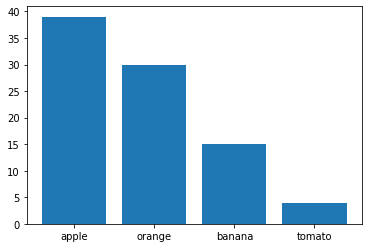

In [39]:
plt.bar(x, y)

Primeiro, você faz as devidas importações. Em seguida, você cria um `Counter` com alguns dados iniciais sobre vendas de frutas (`sales`) e usa `.most_common()` para classificar os dados.

Você usa `zip()` para descompactar o conteúdo das vendas em duas variáveis:

- `x` mantém uma lista de frutas.
- `y` detém as unidades correspondentes vendidas por fruta.

Em seguida, você cria um gráfico de barras, usando `plt.bar()`. No notebook, o gráfico é exibido automaticamente.

Neste gráfico, o eixo horizontal mostra o nome de cada fruta. Enquanto isso, o eixo vertical indica o número de unidades vendidas por fruta.